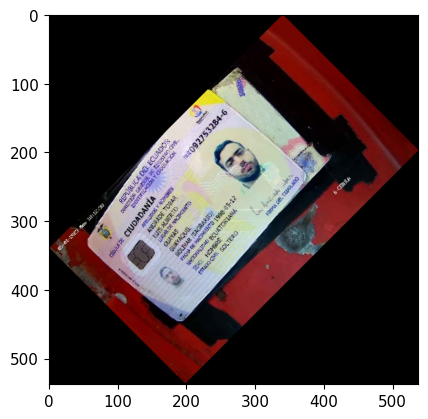

In [39]:
from rembg import remove
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("C:/Users/USER/Documents/Trabajo/Cedulas/imagenes_cedula_peq/Cedula_Guayaquil/ImagenCedula_0azYjnz.jpg") 
img= img.convert("RGB").rotate(45,expand=True)
data = remove(img,only_mask=True)
%matplotlib inline
plt.figure()
plt.imshow(img,cmap="gray")
plt.show()


In [40]:
import os
from PIL import Image
import pandas as pd
ruta_base = "C:/Users/USER/Documents/Trabajo/Cedulas/imagenes_cedula_peq"
df_angle = pd.read_csv("progreso_orientacion.csv")
archivos_procesados = set(df_angle["File"].tolist())

for carpeta_actual, subcarpetas, archivos in os.walk(ruta_base):
    for archivo in archivos:
        if archivo.lower().endswith((".jpg", ".png")):
            if archivo in archivos_procesados:
                ruta_img = os.path.join(carpeta_actual, archivo)
                

print(df_angle)
#for l in df_angle["Matrix"]:
#    print(l)

                          File            Label       Angle
0     ImagenCedula_00Reebs.jpg  Cedula_Amarilla  181.997880
1     ImagenCedula_00UTrgn.jpg  Cedula_Amarilla   10.124672
2     ImagenCedula_00vfXn4.jpg  Cedula_Amarilla  180.000000
3     ImagenCedula_01eGLQS.jpg  Cedula_Amarilla    0.000000
4     ImagenCedula_01Fx1jU.jpg  Cedula_Amarilla  174.588131
...                        ...              ...         ...
1147  ImagenCedula_1TiF7e8.jpg         Papeleta    0.000000
1148  ImagenCedula_1ZSSzMX.jpg         Papeleta  355.192046
1149  ImagenCedula_22etYeM.jpg         Papeleta  357.225723
1150  ImagenCedula_2EuBvAF.jpg         Papeleta  357.709390
1151  ImagenCedula_2Ftu6AJ.jpg         Papeleta    0.000000

[1152 rows x 3 columns]


In [41]:
from cnstd import CnStd
from cnocr import CnOcr
import matplotlib.pyplot as plt 

seccion=CnStd(use_angle_clf=True)
ocr=CnOcr()
#fig,axes=plt.subplots(5,2,figsize=(20,20))
#axes=axes.flatten()

palabras_seccion=seccion.detect(img)
print(palabras_seccion["rotated_angle"])
for palabras in palabras_seccion["detected_texts"]:
    texto = ocr.ocr_for_single_line(palabras["cropped_img"])
    if texto["score"]>0.1:
        print(texto)
        plt.figure()
        plt.imshow(palabras["cropped_img"])
        plt.show()





[INFO] 2025-07-04 17:35:37,666 [RapidOCR] base.py:24: Using engine_name: onnxruntime
[INFO] 2025-07-04 17:35:37,667 [RapidOCR] main.py:55: Using C:\Users\USER\AppData\Roaming\cnstd\1.2\ppocr\ch_PP-OCRv5_det\ch_PP-OCRv5_det_infer.onnx
[INFO] 2025-07-04 17:35:37,784 [RapidOCR] base.py:24: Using engine_name: onnxruntime
[INFO] 2025-07-04 17:35:37,786 [RapidOCR] main.py:55: Using C:\Users\USER\AppData\Roaming\cnstd\1.2\ppocr\ch_PP-OCRv5_det\ch_PP-OCRv5_det_infer.onnx


0.0
